## Instalaciones

In [1]:
# !pip install sdv
# !pip install copulas
# !pip install seaborn
# !pip install pandas
# !pip install seaborn
# !pip install pycaret

## Previo

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [3]:
os.path.abspath("..") in sys.path

True

In [4]:
from funciones import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from copulas.visualization import compare_3d
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot
from time import monotonic
pd.set_option('display.max_columns', None)
# matplotlib.rcParams["font.family"] = "DejaVu Sans"

## Primer Análisis

In [5]:
DataPrincipal = pd.read_csv("../data/ParkinsonData.csv")

In [6]:
DataPrincipal

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
DataPrincipal.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
DataPrincipal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
DataPrincipal.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Figure size 800x500 with 0 Axes>

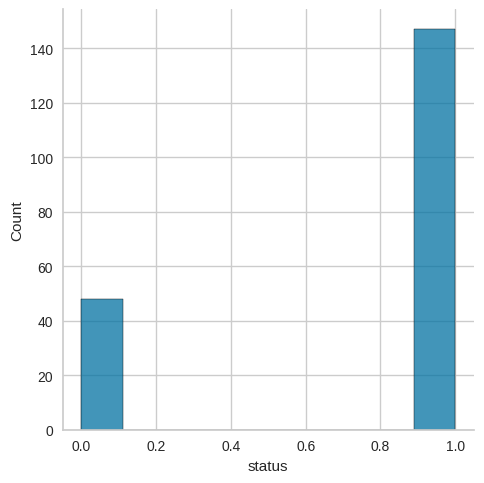

In [10]:
plt.figure(figsize = (8,5))
sns.displot(x = DataPrincipal["status"], kde = False)

In [11]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 147
Número de pacientes sin Parkinson: 48


Como vemos, tenemos una notable diferencia entre el número de pacientes con Parkinson y los que no, hay varias maneras de solucionar esto pero yo he elegido crear datos sintéticos a partir de los datos de sujetos sin Parkinson hasta que llegue al número de sujetos con Parkinson.

**Vamos a eliminar unos registros aleatorios de sujetos enfermos hasta dejarlos en 120 para que el número de datos sintéticos de sujetos sanos no supere el 61%.**

## Primer Modelo

In [12]:
print(len(DataPrincipal[DataPrincipal["status"] == 1]) - 120)

27


In [13]:
for i in range(27):
  DataPrincipal.drop(index = np.random.choice(DataPrincipal[DataPrincipal["status"] == 1].index), inplace = True)
DataPrincipal.reset_index(drop = True, inplace = True)

In [14]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 120
Número de pacientes sin Parkinson: 48


**Ahora debemos generar los datos sintéticos.**

Cómo queremos datos sintéticos solo de los pacientes sanos, pero también queremos que los campos parámetros sean distintos entre los pacientes sanos y enfermos debemos crear datos sintéticos de todos los registros tanto sanos como enfermos y luego solo seleccionar los pacientes enfermos. El campo name se va a quedar para ahorrarnos el trabajo de crear nuevos valores inventados para este campo y poder seguir identificando cada uno de los registros.

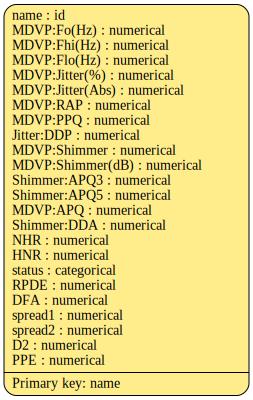

In [15]:
Metadata = SingleTableMetadata()
Metadata.detect_from_dataframe(DataPrincipal)
Metadata.visualize()

>Como vemos el campo name es de tipo id por lo que no se va a comprobar la relación que tiene con los otros campos para crear los datos sintéticos ya que es solo un identificador.

In [16]:
Metadata.validate_data(data=DataPrincipal)

In [17]:
# synthesizer = CTGANSynthesizer(Metadata, verbose = True)
# synthesizer.fit(DataPrincipal)

In [18]:
# Guardar(synthesizer, "synthesizer")

In [19]:
synthesizer = Abrir("synthesizer")

In [20]:
120 - 48

72

Crearemos más del doble de datos sintéticos de los que necesitamos porque solo necesitaremos los datos sintéticos de pacientes sanos.

In [21]:
DataSintetico = synthesizer.sample(num_rows=150)
DataSintetico.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,sdv-id-RTgnor,259.924,142.875,104.695,0.00621,0.000220,0.01577,0.00555,0.01480,0.02238,0.402,0.01457,0.00570,0.10734,0.01364,0.00065,22.942,0,0.324289,0.611542,-7.964984,0.197263,2.205727,0.333648
1,sdv-id-TahEdx,89.521,144.495,107.935,0.00168,0.000007,0.00212,0.00092,0.01107,0.01913,0.230,0.00839,0.01466,0.01585,0.03245,0.00065,29.565,1,0.337867,0.731062,-5.828769,0.450493,3.007577,0.386275
2,sdv-id-RJJjrk,153.780,592.030,103.347,0.00168,0.000220,0.00457,0.00092,0.02132,0.03545,0.085,0.01294,0.00808,0.00719,0.03697,0.00065,27.478,1,0.256570,0.580675,-7.003780,0.258857,1.773263,0.323302
3,sdv-id-QMJVLT,233.159,237.429,65.750,0.01955,0.000220,0.00186,0.00214,0.02838,0.00954,0.099,0.00899,0.04108,0.01669,0.04144,0.00738,24.011,1,0.677477,0.698629,-7.964984,0.275057,3.186966,0.156604
4,sdv-id-NlrEex,189.305,264.898,81.861,0.00168,0.000220,0.00470,0.00092,0.00204,0.01788,0.087,0.01437,0.00570,0.02368,0.01460,0.00065,23.101,0,0.581034,0.718986,-4.394701,0.319092,3.367020,0.163480


In [22]:
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1550.72it/s]|
Data Validity Score: 97.44%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 356.54it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 98.72%



**Nuestros datos sintéticos siguen el mismo formato que los orignales**

In [23]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1717.54it/s]|
Column Shapes Score: 67.68%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 169.06it/s]|
Column Pair Trends Score: 73.61%

Overall Score (Average): 70.65%



**Nuestros datos sintéticos tienen una similaridad del 69.43% con respecto a nuestros datos originales.**

In [24]:
Calidad.get_details('Column Shapes')

,Column,Metric,Score
0,MDVP:Fo(Hz),KSComplement,0.819762
1,MDVP:Fhi(Hz),KSComplement,0.727143
2,MDVP:Flo(Hz),KSComplement,0.808333
3,MDVP:Jitter(%),KSComplement,0.814286
4,MDVP:Jitter(Abs),KSComplement,0.331905
5,MDVP:RAP,KSComplement,0.548810
6,MDVP:PPQ,KSComplement,0.498571
7,Jitter:DDP,KSComplement,0.678810
8,MDVP:Shimmer,KSComplement,0.638571
9,MDVP:Shimmer(dB),KSComplement,0.779762


In [25]:
Calidad.get_details('Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,MDVP:Fo(Hz),MDVP:Fhi(Hz),CorrelationSimilarity,0.863963,0.379102,0.107028
1,MDVP:Fo(Hz),MDVP:Flo(Hz),CorrelationSimilarity,0.726352,0.592581,0.045285
2,MDVP:Fo(Hz),MDVP:Jitter(%),CorrelationSimilarity,0.861966,-0.157019,0.119048
3,MDVP:Fo(Hz),MDVP:Jitter(Abs),CorrelationSimilarity,0.827852,-0.394175,-0.049879
4,MDVP:Fo(Hz),MDVP:RAP,CorrelationSimilarity,0.970537,-0.112308,-0.053382
...,...,...,...,...,...,...
248,spread1,D2,CorrelationSimilarity,0.707855,0.513382,-0.070909
249,spread1,PPE,CorrelationSimilarity,0.467642,0.963602,-0.101114
250,spread2,D2,CorrelationSimilarity,0.784243,0.526170,0.094656
251,spread2,PPE,CorrelationSimilarity,0.658896,0.650705,-0.031503


<Axes: xlabel='Score', ylabel='Count'>

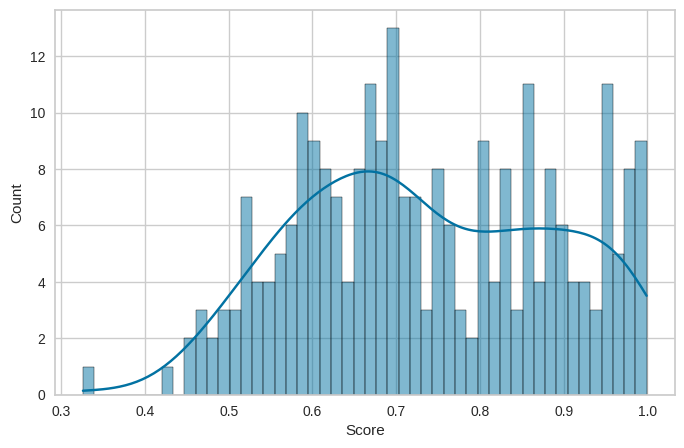

In [26]:
plt.figure(figsize = (8,5))
sns.histplot(x = Calidad.get_details('Column Pair Trends')["Score"], kde = True, bins = 50)

>Podemos observar que hay muchas puntuaciones que son menores de 0.5 y muchas entre 0.6 y 0.8. Muchas columnas no son muy parecidas a las reales.

**Ahora vamos a ver cuanto se parecen las gráficas de densidad de los datos sintéticos y los reales.**

In [27]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

>Muchas veces la gráfica de densidad de los datos sintéticos no está completa debido a que no ha generado datos para un dato concreto de números, si aumentáramos las muestras sintéticas a crear esto no pasaría.
>
>Vemos que las gráficas de densidad de los datos sintéticos se pueden acercar a las de los datos reales, pero hay muchos campos en el que las gráficas de densidad no tienen nada que ver.

In [28]:
synthesizer.get_loss_values_plot().show("vscode")

>Por lo que se ve el modelo no ha tenido suficiente tiempo como para aprender adecuadamente ya que la función de coste del generador no tiende a 0.

**Ahora vamos a comparar los datos sintéticos con los datos reales teniendo en cuenta las relaciones entre 3 campos consecutivos.**

In [29]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

>Podemos ver que aunque en algunos campos los datos reales y sintéticos mantienen las relaciones entre los otros campos, en otros es completamente distinto y mejorable.

**Lo que vamos a hacer va a ser una hiperparametricación sobre el algoritmo para crear datos sintéticos para ver qué valores son los óptimos para conseguir unos datos sintéticos más fiables y cercanos a los reales. Vamos a comenzar por aumentar las épocas de entrenamiento del modelo ya al aumentarlo nunca va a empeorar el modelo pero veremos que llega un punto en el que la mejora no es algo significativo así que intentaremos encontrar el parámetro que tenga mejor relación calidad-tiempo**

**El objeto synthesizer tiene por defecto asignadas 300 épocas que va a realizar asi que los valores que probemos van a ser mayores que 300**


## Hiperparametricación de las épocas

In [30]:
# MejorNEpocas = []
# Epocas = [x for x in range(500,7000,250)]
# Iteracion = 0
# for i in Epocas:
#   try:
#     Inicio = monotonic()
#     Synthesizer = CTGANSynthesizer(Metadata, verbose = False, epochs = i)
#     print("Entrenando modelo / ", end = "")
#     Synthesizer.fit(DataPrincipal)
#     Final = monotonic()
#     DataSintetico = Synthesizer.sample(num_rows=150)
#     Diagnostico = run_diagnostic(
#       DataPrincipal,
#       DataSintetico,
#       Metadata,
#       False
#     )
#     if Diagnostico.get_score() !=1: #Si los datos tienen algún fallo queremos que siga con la siguiente iteración.
#       continue
#     Calidad = evaluate_quality(
#       DataPrincipal,
#       DataSintetico,
#       Metadata,
#       False
#     )
#     print("Iteración nº" + str(Iteracion) + "=", "Tiempo:", str(Final - Inicio) + ",", "Puntuación:", Calidad.get_score())
#     MejorNEpocas.append([Synthesizer, Final - Inicio, Calidad.get_score()])
#     Iteracion += 1
#   except:
#     print("Ha fallado en el intento nº" + i)
#     Guardar(MejorNEpocas, "MejorNEpocas") #Si ocurre algún fallo queremos que guarde la lista igualmente.
    

**Guardamos la variable por si ocurre un error en tiempo de ejecución más adelante, no tener que volver a ejecutar el bucle anterior. Para ello vamos a crear una función para hacerlo de una manera más cómoda.**

In [31]:
# Guardar(MejorNEpocas, "MejorNEpocas")

In [32]:
MejorNEpocas = Abrir("MejorNEpocas")

In [33]:
list(map(lambda x: x[0].epochs, sorted(MejorNEpocas, key = lambda x: x[-1])))

[500,
 750,
 1000,
 2000,
 1750,
 1250,
 1500,
 2250,
 2500,
 3000,
 2750,
 3500,
 6750,
 3250,
 4000,
 4750,
 5750,
 4250,
 6000,
 6500,
 4500,
 5500,
 5000,
 5250,
 6250,
 3750]

Vemos que por lo general cuantas más épocas mejor puntuación tiene el modelo hasta cierto punto

In [34]:
list(map(lambda x: x[-1], sorted(MejorNEpocas, key = lambda x: x[-1])))

[0.7241666230285242,
 0.7434367954630643,
 0.7649656319810981,
 0.7688636186299542,
 0.7827568851123243,
 0.7990660926675324,
 0.8022374673646557,
 0.8117855538028134,
 0.8286816423355651,
 0.8365389545139176,
 0.8406069389593196,
 0.8479432836530773,
 0.8540522903533978,
 0.8546266628414418,
 0.8555463673407812,
 0.8577372498408729,
 0.8590352571229457,
 0.8597023028321551,
 0.8606314689545143,
 0.8608399274140842,
 0.860850997570169,
 0.8638212271970491,
 0.8649291536347292,
 0.870889187836347,
 0.8748813873617582,
 0.8800949204195001]

In [35]:
ListaEpocas = pd.DataFrame(list(map(lambda x: x[-1], sorted(MejorNEpocas, key = lambda x: x[-1]))),
             index = list(map(lambda x: x[0].epochs, sorted(MejorNEpocas, key = lambda x: x[-1]))),
             columns = ["Puntuación"])

<Axes: >

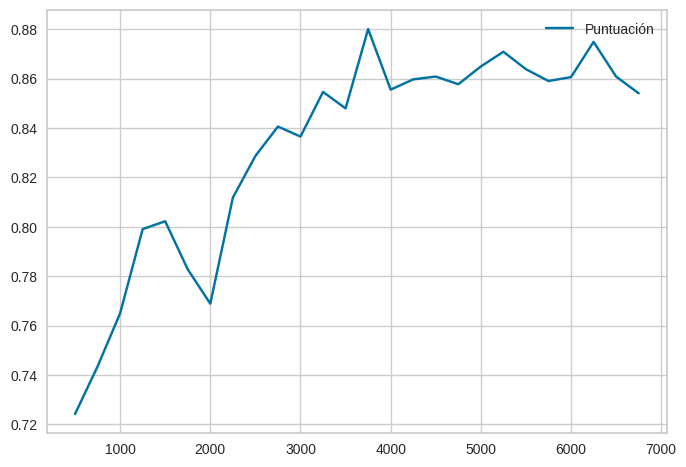

In [36]:
sns.lineplot(ListaEpocas)

>Vemos que a partir de las 4000 épocas ya no mejora la puntuación así que ya sabemos alrededor de cuántas épocas puede necesitar el modelo para entrenar.

In [37]:
sorted(MejorNEpocas, key = lambda x: x[-1], reverse = True)[0][0].get_loss_values_plot().show("vscode")

## Mejora de los datos sintéticos.

**Vamos a ver la mejora que han tenido estos datos.**

In [38]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], sorted(MejorNEpocas, key = lambda x: x[-1], reverse = True)[0][0].sample(num_rows=150).iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

**Parece que los datos se van acercando más a lo que necesitamos, pero todavía es mejorable.**

Los parámetros con los que vamos a realizar la hiperparametrización son:
* Epocas
* batch_size
* discriminator_decay
* discriminator_lr
* discriminator_steps
* embedding_dim
* generator_decay
* generator_lr
* pac

**Vamos usar una función propia de hiperparametrización aleatoria que hace un número mínimo de iteraciones.**

In [4]:
MejoresParametros = Abrir("MejoresParametros")

In [11]:
MejoresParametros[6]["LossesPlot"].show("vscode")

In [6]:
Media = 50

In [7]:
Mejor = np.mean(np.abs(MejoresParametros[3]["Losses"]["Generator Loss"][:Media]))

In [8]:
Contador = 0

In [9]:
Mejor

5.6572575187683105

In [10]:
np.mean(np.abs(MejoresParametros[3]["Losses"]["Generator Loss"][200:250]))

2.2216301181912423

In [11]:
np.mean(np.abs(MejoresParametros[3]["Losses"]["Generator Loss"][203:253]))

2.3234937146306036

In [12]:
3.4203041112422943 + 0.01 < 3.3792137134075166

False

In [13]:
3.7407

3.7407

In [14]:
MejoresParametros[3]["Losses"]["Generator Loss"][:-(50+1):-1]

3249    4.100364
3248    3.122345
3247   -0.523347
3246    0.279090
3245    1.806367
3244   -1.551329
3243   -3.996608
3242   -3.736880
3241   -0.943146
3240   -2.011938
3239    1.405694
3238    1.876121
3237    1.507338
3236    7.085036
3235    4.200224
3234    4.444698
3233    3.962356
3232   -1.357742
3231    1.079996
3230    3.444297
3229    2.752627
3228    4.127641
3227    0.034258
3226   -0.733270
3225    1.614252
3224    3.476896
3223    0.522525
3222    4.029657
3221    5.126729
3220    1.540768
3219    2.681077
3218    4.044192
3217    1.507374
3216    1.170399
3215    2.803679
3214    3.300639
3213    4.729693
3212    1.269506
3211    0.557562
3210    1.348728
3209    0.170305
3208    0.118115
3207    2.897401
3206    2.924806
3205    2.876324
3204    4.699634
3203    3.994648
3202    1.830419
3201   -0.693002
3200    0.294286
Name: Generator Loss, dtype: float64

In [15]:
for x in range(len(MejoresParametros[3]["Losses"]["Discriminator Loss"])):
    Loss = MejoresParametros[3]["Losses"]["Discriminator Loss"][:x]
    if x >= (Media - 1):
        print("x: ", x, "Res: ", np.mean(np.abs(Loss[:-(Media+1):-1])), "Mejor: ", Mejor)
        if np.mean(np.abs(Loss[:-(Media+1):-1])) + 0.01 < Mejor:
            Mejor = np.mean(np.abs(Loss[:-(Media+1):-1]))
            print("Ha mejorado")
            Contador = 0
        else:
            print("No ha mejorado")
            Contador += 1

x:  49 Res:  3.100647284668319 Mejor:  5.6572575187683105
Ha mejorado
x:  50 Res:  3.0682817083597183 Mejor:  3.100647284668319
Ha mejorado
x:  51 Res:  3.1183923226594925 Mejor:  3.0682817083597183
No ha mejorado
x:  52 Res:  3.204615699648857 Mejor:  3.0682817083597183
No ha mejorado
x:  53 Res:  3.143315092921257 Mejor:  3.0682817083597183
No ha mejorado
x:  54 Res:  3.131855475306511 Mejor:  3.0682817083597183
No ha mejorado
x:  55 Res:  2.9560770386457444 Mejor:  3.0682817083597183
Ha mejorado
x:  56 Res:  2.8882783764600752 Mejor:  2.9560770386457444
Ha mejorado
x:  57 Res:  2.8654255360364913 Mejor:  2.8882783764600752
Ha mejorado
x:  58 Res:  2.837988469004631 Mejor:  2.8654255360364913
Ha mejorado
x:  59 Res:  2.734663192629814 Mejor:  2.837988469004631
Ha mejorado
x:  60 Res:  2.4534750670194625 Mejor:  2.734663192629814
Ha mejorado
x:  61 Res:  2.362548763155937 Mejor:  2.4534750670194625
Ha mejorado
x:  62 Res:  2.259596897959709 Mejor:  2.362548763155937
Ha mejorado
x:  63

In [85]:
MejoresParametros[3]["LossesPlot"].show("vscode")

In [39]:
ArquitecturasRN = ((32,64,128,256,256,128,64,32),
                   (64,128,256,256,128,64),
                   (256,256,128,64,32),
                   (128,128,32),
                   (32,128,512,128,32),
                   (32,64,32),
                   (256,512,256),
                   (256,512,256,32))

In [40]:
Params = Hiper(Principal = DataPrincipal,
               Meta = Metadata,
               RangoEpocas = range(2000, 6001, 250),
               RangoBatchSize = range(42, 169, 42),
               RangoDiscriminatorDim = ArquitecturasRN,
               RangoDiscriminatorDecay = (1e-3, 1e-4, 1e-5, 1e-6),
               RangoDiscriminatorLR = (2e-2, 2e-3, 2e-4),
               RangoDiscriminatorSteps = (1, 2, 3, 4),
               RangoEmbeddingDim = (64, 128, 256, 512),
               RangoGeneratorDim = ArquitecturasRN,
               RangoGeneratorDecay = (1e-3, 1e-4, 1e-5, 1e-6),
               RangoGeneratorLR = (2e-2, 2e-3, 2e-4),
               RangoPac = (3,6,7,14,21),
               EarlyStoppingEspera = 20,
               EarlyStoppingDisminucion = 0.02,
               Limite = 10000)

Combinaciones creadas / Entrenando modelo / 

Gen. (1.19) | Discrim. (5.33):  10%|▉         | 500/5250 [03:30<33:19,  2.38it/s]    


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 1, Puntuación: 0.6232068624649985
Entrenando modelo / 

Gen. (-0.44) | Discrim. (-2.69):  12%|█▎        | 500/4000 [02:57<20:40,  2.82it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 2, Puntuación: 0.6763405097647834
Entrenando modelo / 

Gen. (1.83) | Discrim. (-1.16):  13%|█▎        | 500/3750 [01:20<08:43,  6.20it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 3, Puntuación: 0.6662261042810402
Entrenando modelo / 

Gen. (-0.14) | Discrim. (0.71):  12%|█▎        | 500/4000 [01:08<08:00,  7.28it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 4, Puntuación: 0.6072653257436529
Entrenando modelo / 

Gen. (-1.44) | Discrim. (0.35):  15%|█▌        | 500/3250 [02:07<11:41,  3.92it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 5, Puntuación: 0.7179610331405963
Entrenando modelo / 

Gen. (-2.33) | Discrim. (0.27):   9%|▊         | 500/5750 [02:23<25:03,  3.49it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 6, Puntuación: 0.5857749709540914
Entrenando modelo / 

Gen. (-2.38) | Discrim. (-0.08):  25%|██▌       | 500/2000 [08:35<25:47,  1.03s/it]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 7, Puntuación: 0.5854316837703585
Entrenando modelo / 

Gen. (-9.57) | Discrim. (-2.43):  18%|█▊        | 500/2750 [04:06<18:27,  2.03it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 8, Puntuación: 0.6365177666433327
Entrenando modelo / 

Gen. (0.84) | Discrim. (-1.23):  10%|█         | 503/5000 [01:57<17:32,  4.27it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 9, Puntuación: 0.7192904611165649
Entrenando modelo / 

Gen. (-0.62) | Discrim. (1.72):  10%|▉         | 500/5250 [02:17<21:49,  3.63it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 10, Puntuación: 0.6881025002290666
Entrenando modelo / 

Gen. (-6.29) | Discrim. (-12.99):  20%|██        | 500/2500 [02:02<08:08,  4.09it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 11, Puntuación: 0.7723069101441631
Entrenando modelo / 

Gen. (-1.37) | Discrim. (-0.43):  13%|█▎        | 500/3750 [00:44<04:52, 11.12it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 12, Puntuación: 0.6053550397406723
Entrenando modelo / 

Gen. (-7.22) | Discrim. (-1.20):   8%|▊         | 500/6000 [00:55<10:05,  9.09it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 13, Puntuación: 0.4538238499593062
Entrenando modelo / 

Gen. (2.75) | Discrim. (1.21):  11%|█         | 500/4750 [01:58<16:51,  4.20it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 14, Puntuación: 0.6689938800646158
Entrenando modelo / 

Gen. (1.94) | Discrim. (-1.82):  10%|▉         | 500/5250 [02:27<23:25,  3.38it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 15, Puntuación: 0.7322997464581866
Entrenando modelo / 

Gen. (0.60) | Discrim. (-2.79):   9%|▊         | 500/5750 [03:36<37:55,  2.31it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 16, Puntuación: 0.6145002273053519
Entrenando modelo / 

Gen. (3.46) | Discrim. (-2.04):  17%|█▋        | 500/3000 [01:50<09:14,  4.51it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 17, Puntuación: 0.6463993939917086
Entrenando modelo / 

Gen. (2.08) | Discrim. (-2.77):  13%|█▎        | 500/3750 [01:53<12:16,  4.42it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 18, Puntuación: 0.6002750110180658
Entrenando modelo / 

Gen. (0.16) | Discrim. (1.24):   9%|▉         | 500/5500 [04:05<40:54,  2.04it/s]    


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 19, Puntuación: 0.7626060581047049
Entrenando modelo / 

Gen. (-0.54) | Discrim. (3.46):  18%|█▊        | 500/2750 [01:53<08:28,  4.42it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 20, Puntuación: 0.566965205331485
Entrenando modelo / 

Gen. (-0.43) | Discrim. (-1.20):  17%|█▋        | 500/3000 [02:48<14:02,  2.97it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 21, Puntuación: 0.6340233333220123
Entrenando modelo / 

Gen. (1.19) | Discrim. (-0.31):  14%|█▍        | 500/3500 [02:44<16:28,  3.03it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 22, Puntuación: 0.7588989092371297
Entrenando modelo / 

Gen. (-0.20) | Discrim. (-0.26):   8%|▊         | 500/6000 [02:20<25:48,  3.55it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 23, Puntuación: 0.7988344831784988
Entrenando modelo / 

Gen. (12.02) | Discrim. (-25.25):  13%|█▎        | 500/3750 [05:10<33:35,  1.61it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 24, Puntuación: 0.687856574387445
Entrenando modelo / 

Gen. (0.35) | Discrim. (-0.64):  14%|█▍        | 500/3500 [00:42<04:14, 11.77it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 25, Puntuación: 0.6500657681981381
Entrenando modelo / 

Gen. (-4.66) | Discrim. (4.68):  25%|██▌       | 500/2000 [02:16<06:49,  3.66it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 26, Puntuación: 0.7094537834485177
Entrenando modelo / 

Gen. (1.15) | Discrim. (-3.26):  12%|█▎        | 500/4000 [09:50<1:08:51,  1.18s/it] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 27, Puntuación: 0.6724356458667096
Entrenando modelo / 

Gen. (1.11) | Discrim. (-0.25):  12%|█▎        | 500/4000 [02:35<18:06,  3.22it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 28, Puntuación: 0.7699550686188966
Entrenando modelo / 

Gen. (-6.95) | Discrim. (-0.51):  18%|█▊        | 500/2750 [02:28<11:08,  3.36it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 29, Puntuación: 0.6843198696007295
Entrenando modelo / 

Gen. (2.00) | Discrim. (-0.02):  12%|█▎        | 500/4000 [01:46<12:22,  4.72it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 30, Puntuación: 0.7265795575920104
Entrenando modelo / 

Gen. (-1.45) | Discrim. (-0.36):  15%|█▌        | 530/3500 [01:27<08:09,  6.06it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 31, Puntuación: 0.7775442822207483
Entrenando modelo / 

Gen. (1.56) | Discrim. (-4.20):  12%|█▏        | 500/4250 [03:39<27:28,  2.28it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 32, Puntuación: 0.55047300435153
Entrenando modelo / 

Gen. (0.65) | Discrim. (-0.81):  12%|█▏        | 500/4250 [02:26<18:20,  3.41it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 33, Puntuación: 0.7976297078876838
Entrenando modelo / 

Gen. (-0.21) | Discrim. (1.02):   9%|▉         | 500/5500 [01:57<19:39,  4.24it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 34, Puntuación: 0.7482133199706145
Entrenando modelo / 

Gen. (5.60) | Discrim. (-0.83):  13%|█▎        | 500/3750 [06:54<44:57,  1.20it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 35, Puntuación: 0.6107959101173923
Entrenando modelo / 

Gen. (-5.98) | Discrim. (6.42):  12%|█▏        | 500/4250 [01:12<09:02,  6.91it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 36, Puntuación: 0.7509310434393814
Entrenando modelo / 

Gen. (-0.54) | Discrim. (0.18):  11%|█         | 500/4750 [04:26<37:43,  1.88it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 37, Puntuación: 0.6187639984992358
Entrenando modelo / 

Gen. (-2.42) | Discrim. (0.10):  12%|█▎        | 500/4000 [03:04<21:31,  2.71it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 38, Puntuación: 0.7737694004444355
Entrenando modelo / 

Gen. (-3.57) | Discrim. (-1.71):   8%|▊         | 500/6000 [01:43<19:00,  4.82it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 39, Puntuación: 0.6782932218067176
Entrenando modelo / 

Gen. (1.18) | Discrim. (-0.52):  20%|██        | 500/2500 [00:57<03:51,  8.63it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 40, Puntuación: 0.5971822154616333
Entrenando modelo / 

Gen. (0.69) | Discrim. (1.73):  12%|█▏        | 500/4250 [02:37<19:42,  3.17it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 41, Puntuación: 0.6284687484890589
Entrenando modelo / 

Gen. (2.10) | Discrim. (-1.01):  13%|█▎        | 500/3750 [04:37<30:00,  1.80it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 42, Puntuación: 0.7115145828386226
Entrenando modelo / 

Gen. (1.98) | Discrim. (-0.84):  13%|█▎        | 500/3750 [01:58<12:49,  4.23it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 43, Puntuación: 0.6753206376469101
Entrenando modelo / 

Gen. (-2.43) | Discrim. (-2.32):  11%|█         | 500/4750 [04:56<42:00,  1.69it/s]  


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 44, Puntuación: 0.6268133886918288
Entrenando modelo / 

Gen. (6.67) | Discrim. (1.82):  12%|█▎        | 500/4000 [02:14<15:40,  3.72it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 45, Puntuación: 0.6324767965411988
Entrenando modelo / 

Gen. (11.90) | Discrim. (49.07):  11%|█         | 500/4750 [04:29<38:13,  1.85it/s]    


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 46, Puntuación: 0.6200527219962652
Entrenando modelo / 

Gen. (-5.28) | Discrim. (-1.13):  11%|█         | 500/4750 [01:08<09:45,  7.26it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 47, Puntuación: 0.42304316963026156
Entrenando modelo / 

Gen. (1.85) | Discrim. (-4.44):  22%|██▏       | 500/2250 [02:13<07:48,  3.73it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 48, Puntuación: 0.6132974653969521
Entrenando modelo / 

Gen. (-15.48) | Discrim. (5.10):  13%|█▎        | 500/3750 [04:33<29:37,  1.83it/s]    


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 49, Puntuación: 0.6633930365720391
Entrenando modelo / 

Gen. (-1.89) | Discrim. (-0.78):  22%|██▏       | 500/2250 [01:39<05:49,  5.01it/s]


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 50, Puntuación: 0.6167928636017903
Entrenando modelo / 

Gen. (-0.81) | Discrim. (-2.00):  10%|▉         | 500/5250 [01:10<11:08,  7.11it/s]   


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 51, Puntuación: 0.5740622830987288
Entrenando modelo / 

Gen. (-2.49) | Discrim. (0.05):  18%|█▊        | 500/2750 [01:06<04:59,  7.51it/s] 


Se detuvo el entrenamiento prematuramente debido a la falta de mejora.
Nº 52, Puntuación: 0.4626918164596257
Entrenando modelo / 

Gen. (0.72) | Discrim. (-0.94):   9%|▊         | 342/4000 [04:28<47:46,  1.28it/s]  


Ha fallado en el intento nº 53


KeyboardInterrupt: 

In [ ]:
# RangoEmbeddingDim = range(20,221,40)

In [ ]:
#probar DiscriminatorDim y GeneratorDim

In [ ]:
DataPrincipal["name"]

In [ ]:
DataPrincipal[["name", "status"]][:50]

> Parece que el número seguido de la S en el campo "name" representa a un sujeto concreto por lo que siempre va a dar el mismo estado(Este campo lo tendrémos que eliminar más tarde para que el modelo no aprenda según el nombre del sujeto).

In [ ]:
sns.pairplot(pd.concat([DataPrincipal.iloc[:,1:4], DataPrincipal["status"]], axis = 1), hue = "status")

>Las gráficas nos muestran cierta relación entre los 3 campos de la frecuencia fundamental de la voz y el estado del sujeto ya que vemos ciertas zonas ne las que hay mucha densidad de representaciones de sujetos con Parkinson y poca de sujetos sanos. También vemos que tienen cierta relación unos con otros de manera lineal. Antes de ver las gráficas de densidad debemos tener en cuenta que hay muchos más sujetos con Parkinson que sin él en estos datos por lo que los máximos serán más grandes en los sujetos con Parkinson.
>
>Si nos fijamos en las gráficas de densidad de Flo(Hz) vemos que los sujetos con Parkinson son propensos a tener una frecuencia mínima fundamental de 100Hz pero esta también es la frecuencia mínima fundamental más común de los sujetos sanos, podemos usar este campo como parámetro para nuestro modelo pero junto a otros ya que no tiene una relación muy fuerte.
>
>Si nos fijamos en las gráficas de densidad de Fhi(hz) vemos que tiene nula relación con el estado ya que ambas tienen los máximos alrededor de 200 por lo que no nos servirá de nada para nuestro modelo.
>
>Pero si miramos las gráficas de densidad de Fo(Hz) observamos que tienen los máximos en diferentes rangos de valores por lo que hay una diferencia clara en la frecuencia fundamental media vocal de los pacientes con Parkinson y sin él por lo que trabajaremos sobre este campo más adelante para poder obtener la mayor información posible de esta relación.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Flo(Hz) / MDVP:Fo(Hz)
  - Relación MDVP:Flo(Hz)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Pico de densidad notable.
  - Relación MDVP:Fo(Hz)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Pico de densidad notable.
    * Picos de densidad diferenciables.

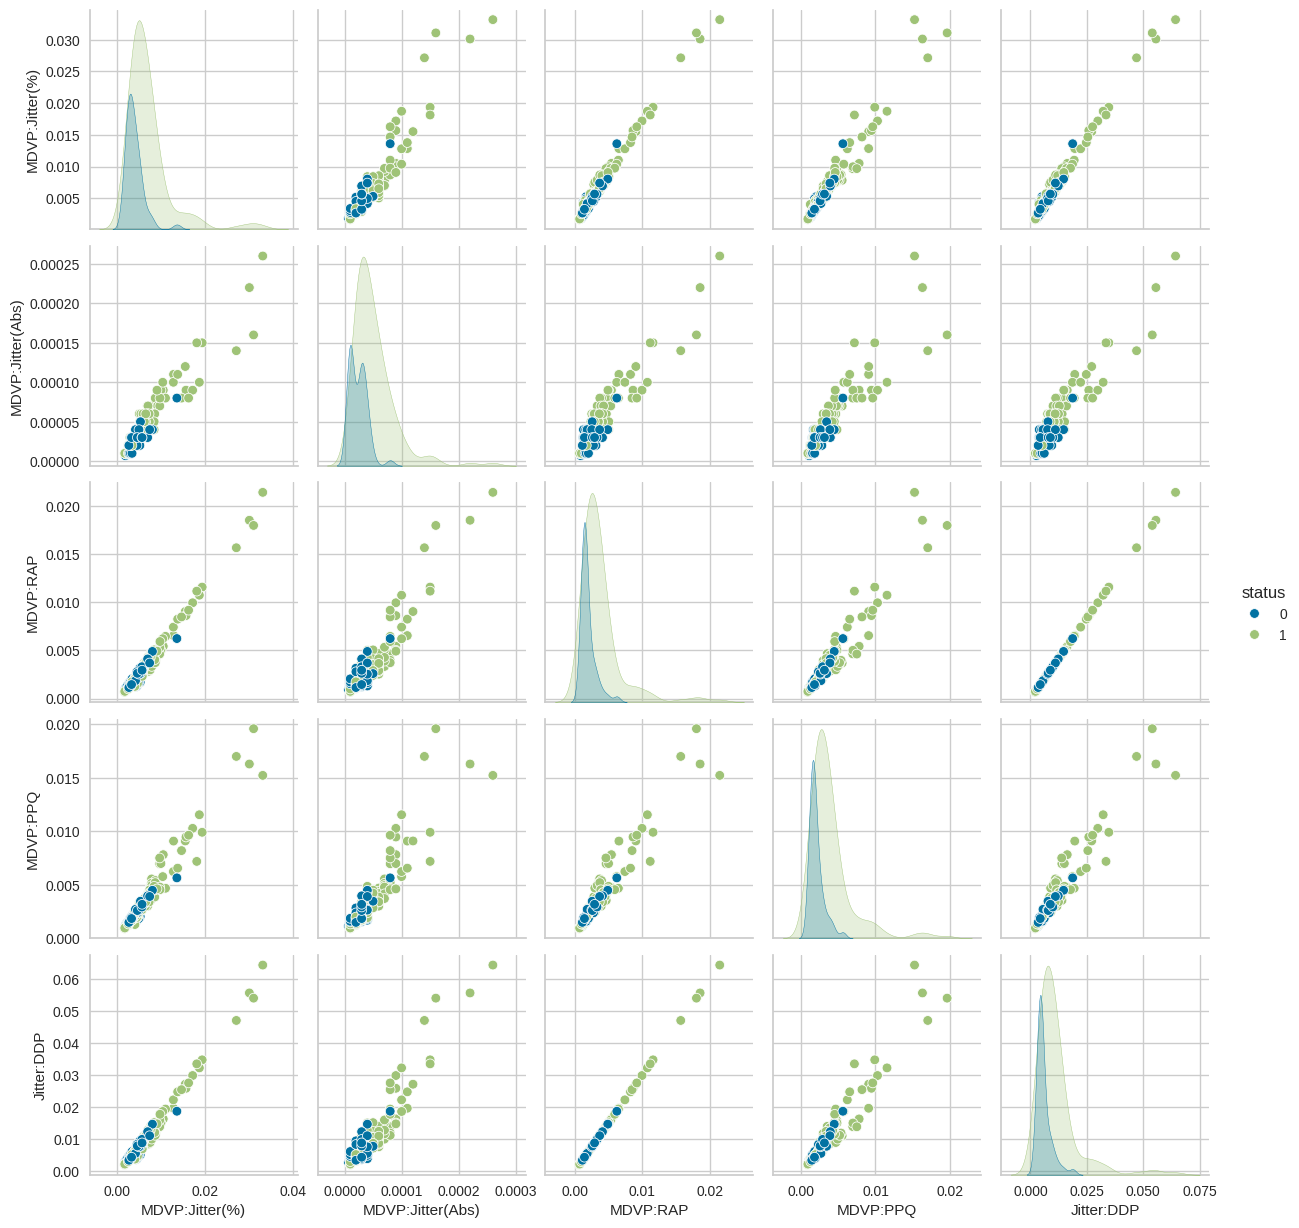

In [ ]:
sns.pairplot(pd.concat([DataPrincipal.iloc[:,4:9], DataPrincipal["status"]], axis = 1), hue = "status")

> Podemos observar que los sujetos con parkinson tienen cierta tendencia a acercarse a algunos valores de estos campos, También vemos que las gráficas de densidad ahora no nos muestran diferencias notables en cuando a la altura de los picos ni diferencias en cuanto al valor donde se situan los 2 picos pero sí vemos que los valores atípicos de las gráficas de densidad de los sujetos enfermos es más amplio que el de los sanos. Debemos tener esto en cuenta para predecir también a partir de características no comunes de la enfermedad.
>
>También hay bastante relación entre todos los campos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Jitter(%) / MDVP:Jitter(Abs) / MDVP:RAP / MDVP:PPQ / Jitter:DDP
  - Relación MDVP:Jitter(%)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:Jitter(Abs)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:RAP-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:PPQ-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación Jitter:DDP-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.

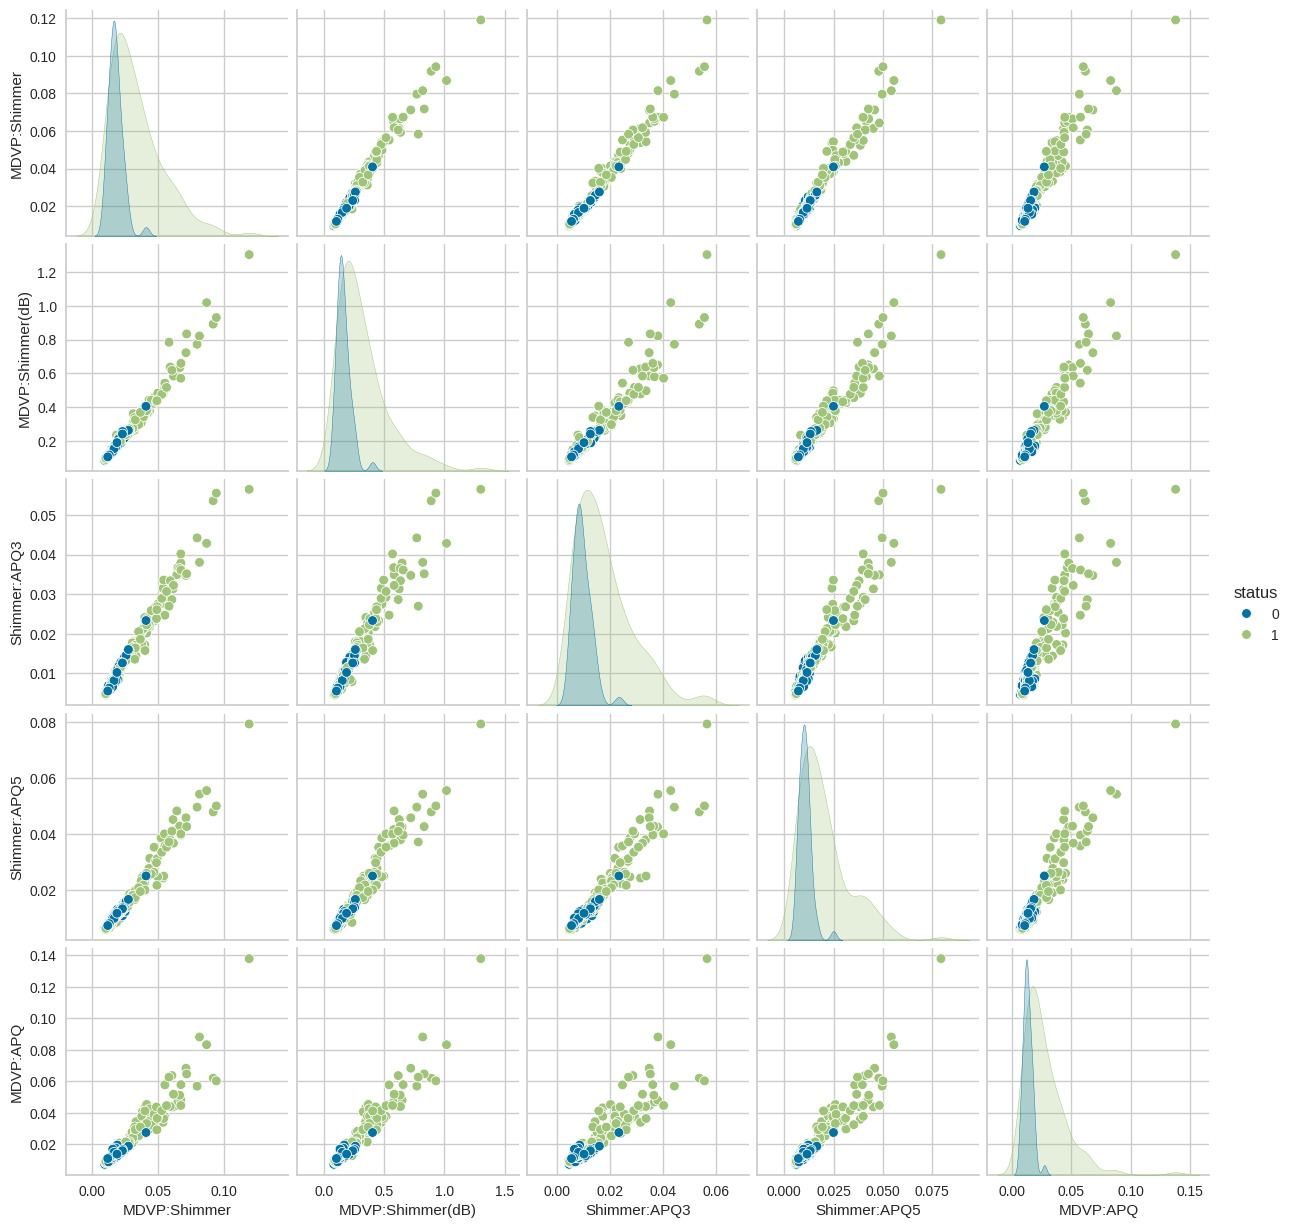

In [ ]:
sns.pairplot(pd.concat([DataPrincipal.iloc[:,9:14], DataPrincipal["status"]], axis = 1), hue = "status")

> En estas gráficas ocurre lo mismo, los sujetos con Parkinson tienden mucho a tener ciertos valores, pero son unos valores tan comunes también en sujetos sanos que no se puede tener en cuenta como un parámetro de importancia individualmente, pero los sujetos con Parkinson ocupan por lo general un rango más amplio lo que puede querer decir que algunos de estos sujetos con Parkinson tienen valores poco habituales de estos campos, esto puede ser debido a que hay más sujetos con Parkinson con lo que es más probable encontrarse con alguien que se salga de lo común independientemente de si tiene Parkinson o no, pero también puede ser que a unos pocos les afecte de manera distinta a lo normal, entonces estos campos no servirían individualmente para asegurar que tienen Parkinson. Pero si viéramos valores irregulares en este parámetro junto con otros valores irregulares de otros campos en un sujeto, aunque no sean características comunes del Parkinson son varias características poco comunes en un solo sujeto, lo que nos puede ayudar no solo a predecir personas con la enfermedad cunado tienen características comunes con respecto a la voz sino que nos puede ayudar también a predecir sujetos que tienen la enfermedad y no tienen síntomas comunes los cuales podrían pasar desapercibido debido a que no presentan un solo sintoma habitual pero sí presentan muchos síntomas no habituales.

>También podemos ver que todos los campos están bastante relacionados unos con otros lo que nos lleva a pensar que tal vez es mejor crear un solo campo que tenga información de todos estos.

>Observamos que tienen las mismas características que los campos de las gráficas anteriores pero en el caso de las gráficas de densidad, los valores atípicos están más diferenciados entre las 2 gráficas.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Shimmer / MDVP:Shimmer(dB) / Shimmer:APQ3 / Shimmer:APQ5 / MDVP:APQ
  - Relación MDVP:Shimmer-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:Shimmer(dB)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación Shimmer:APQ3-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación Shimmer:APQ5-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:APQ:-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.

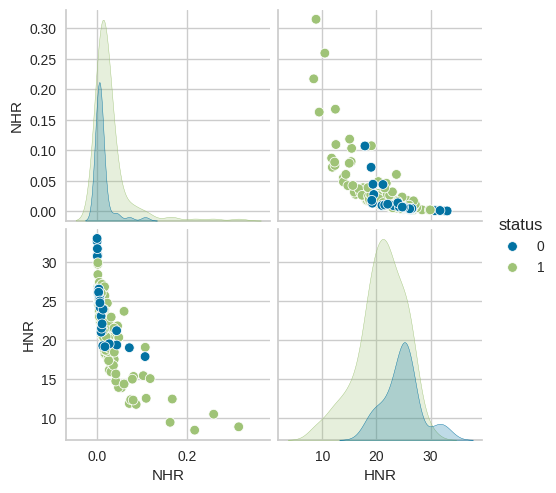

In [ ]:
sns.pairplot(pd.concat([DataPrincipal[["NHR", "HNR"]], DataPrincipal["status"]], axis = 1), hue = "status")

>El campo NHR no nos da nada de información ya que los 2 picos son alrededor de los mismos valores, las 2 gráficas tienen más o menos el mismo rango de valores y el mismo valor por el que ronda los picos de ambas gráficas. Pero el campo HNR sí nos puede servir para identificar características poco comunes.
>
>Como observación podemos decir que los campos HNR y NHR tienen una posible relación re proporcionalidad inversa.

+ Relación entre los campos: Todos con todos(inversamente proporcional).
+ Relación con la variable objetivo: HNR
  - Relación HNR-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
    * Pico de densidad diferenciable del objetivo.

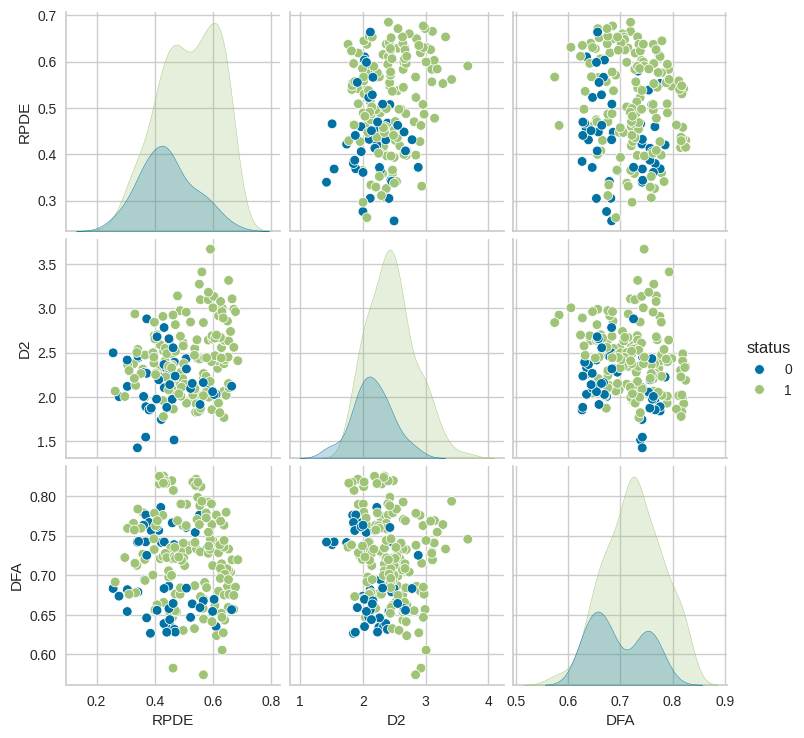

In [ ]:
sns.pairplot(pd.concat([DataPrincipal[["RPDE", "D2", "DFA"]], DataPrincipal["status"]], axis = 1), hue = "status")

>El campo RPDE nos puede servir para obtener características comunes de la enfermedad pero no para características no comunes. En cambio los campos D2 y DFA nos puede servir para ambas cosas. Observamos también que no tienen prácticamente ninguna relación ningún campo con el otro.
>
>Si nos fijamos en las gráficas de dispersión que relacionan D2 y RPDE podemos ver que son las únicas que tienen un area en la que hay muchos sujetos con Parkinson y muy pocos sin él, aunque la mayoría del resto de sujetos está muy mezclado, esto nos puede servir para predecir características no comunes de la enfermedad. No podemos decir que estos campos por separado tienen valores diferenciadores entre sujetos sanos y enfermos sino que funcionan como pareja. Estos campos individualmente no nos ayudan a der bien aread diferentes entre sujetos sanos y enfermos como podemos ver en las otras gráficas en las que se relacionan estos campos con DFA.

+ Relación entre los campos: Ninguna.
+ Relación con la variable objetivo: (RPDE_D2) / DFA
  - Relación DFA-objetivo:
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
    * Pico de densidad diferenciable del objetivo.
  - Relación (RPDE_D2)-objetivo:
    * Valores atípicos de sujetos enfermos diferentes a los sanos.

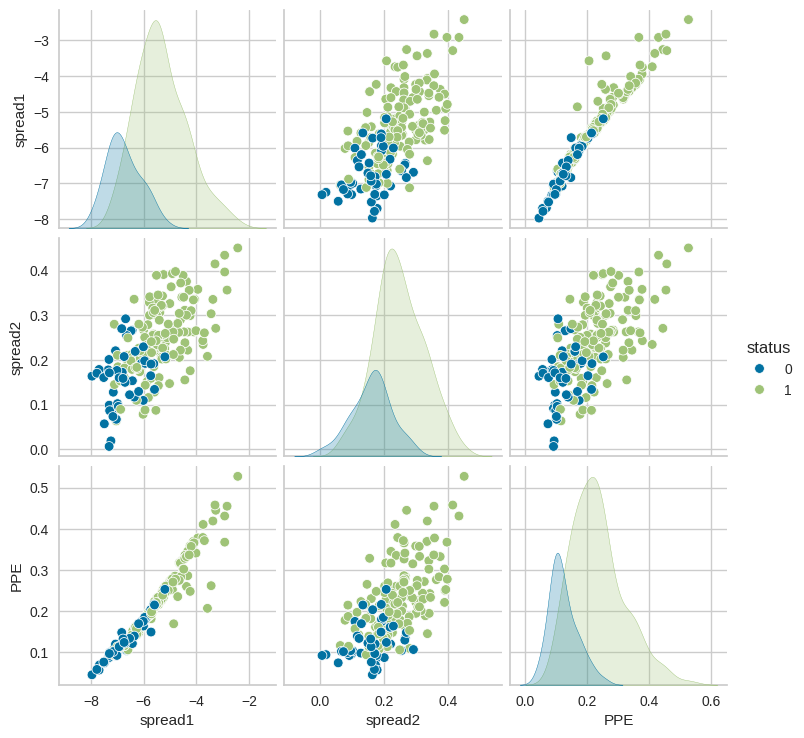

In [ ]:
sns.pairplot(pd.concat([DataPrincipal[["spread1","spread2","PPE"]], DataPrincipal["status"]], axis = 1), hue = "status")

>En este caso los campos spread1, spread2 y PPE tienen diferencias ligeras en cuanto a los picos entre los pacientes con Parkinson y los que no. Es algo ligero pero podríamos trabajar en estos datos para obtener otros datos más valiosos. Además, podemos ver que están bastante relacionados entre ellos.
>
>Para finalizar, vemos que los campos spread1 y PPE tienen bastante relación.

**Vamos a guardar los nombres de los campos que pueden no tener información importante de por sí debido a que los valores comunes de los sujetos con y sin Parkinson coinciden pero no los valores poco comunes de los sujetos con Parkinson para realizar feature engineering con estos campos en conjunto.**

**Es decir, vamos a guardar los nombres de los campos que solo nos servirán para que nuestro modelo también pueda predecir los sujetos con muchas características no comunes que pudieran pasar desapercibidos.**

In [ ]:
CarNoComunes = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)",
          "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
          "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA",
          "HNR", "spread1", "spread2", "PPE"]

**Ahora vamos a guardar los nombres de los campos que nos servirán para que nuestro modelo pueda predecir lso sujetos con Parkinson que tienen características comunes.**

In [ ]:
CarComunes = ["MDVP:Fo(Hz)", "MDVP:Flo(Hz)"]

In [ ]:
DataPrincipal.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')